# 🌲 Random Forest Complete Analysis - Eye of Emergency

## 🎯 Objectifs du Notebook

Ce notebook complet implémente l'analyse Random Forest pour la classification des tweets d'urgence selon le workflow défini :

### 📋 Étapes complètes :
1. **📊 Chargement et préparation** des données (`train_optimized.csv`)
2. **🔧 Preprocessing** et validation des 17 features ML
3. **🤖 Entraînement Random Forest** avec optimisation des hyperparamètres
4. **📈 Évaluation complète** : métriques, matrices de confusion, visualisations
5. **🧪 Test final** sur `test_cleaned.csv` avec feature engineering temps réel
6. **💾 Sauvegarde** des résultats dans `results/` avec structure organisée

### 🎯 Livrables générés :
- `results/randomforest/models/randomforest_best_model.pkl` - Modèle optimisé
- `results/randomforest/figures/` - Visualisations et graphiques
- `results/randomforest/metrics/` - Métriques et performances détaillées
- `results/randomforest/reports/` - Rapports de classification
- `results/randomforest/predictions/` - Prédictions finales

---

**Dataset :** 6,185 tweets avec 17 features ML + métadonnées

In [24]:
# Imports et Configuration - Random Forest Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import time

warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Imports de base réussis")

# Création de la structure hiérarchique des résultats avec sous-dossier randomforest
os.makedirs('../results', exist_ok=True)
os.makedirs('../results/randomforest', exist_ok=True)
os.makedirs('../results/randomforest/models', exist_ok=True)
os.makedirs('../results/randomforest/figures', exist_ok=True)
os.makedirs('../results/randomforest/predictions', exist_ok=True)
os.makedirs('../results/randomforest/metrics', exist_ok=True)
os.makedirs('../results/randomforest/reports', exist_ok=True)

print("Structure hiérarchique des résultats créée!")
print("Structure results/randomforest/ créée:")
print("   - randomforest/models/ : Modèles Random Forest entraînés")
print("   - randomforest/figures/ : Visualisations et graphiques Random Forest")
print("   - randomforest/predictions/ : Prédictions finales Random Forest")
print("   - randomforest/metrics/ : Métriques et performances Random Forest")
print("   - randomforest/reports/ : Rapports détaillés Random Forest")

# Import des outils ML avec Random Forest
try:
    from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
    from sklearn.preprocessing import LabelEncoder
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
    from sklearn.metrics import ConfusionMatrixDisplay
    print("Sklearn importé avec succès")
    ML_AVAILABLE = True
    RF_AVAILABLE = True
except ImportError as e:
    print(f"Erreur ML: {e}")
    print("Impossible d'utiliser Random Forest")
    ML_AVAILABLE = False
    RF_AVAILABLE = False

print(f"Prêt pour l'analyse Random Forest (disponible: {RF_AVAILABLE})")

Imports de base réussis
Structure hiérarchique des résultats créée!
Structure results/randomforest/ créée:
   - randomforest/models/ : Modèles Random Forest entraînés
   - randomforest/figures/ : Visualisations et graphiques Random Forest
   - randomforest/predictions/ : Prédictions finales Random Forest
   - randomforest/metrics/ : Métriques et performances Random Forest
   - randomforest/reports/ : Rapports détaillés Random Forest
Sklearn importé avec succès
Prêt pour l'analyse Random Forest (disponible: True)


## 📊 ÉTAPE 1: Chargement et Validation des Données

In [25]:
# 🔄 Chargement du dataset train_optimized.csv
print("📂 Chargement des données d'entraînement...")
df = pd.read_csv('../data/processed/train_optimized.csv')

# 📋 Informations sur le dataset
print(f"📊 Forme du dataset: {df.shape}")
print(f"📋 Colonnes disponibles ({len(df.columns)}): {list(df.columns)}")

# 🎯 Distribution des classes
print(f"\n🎯 Distribution des classes:")
class_distribution = df['target'].value_counts().sort_index()
print(class_distribution)
print(f"📈 Pourcentage de tweets d'urgence: {df['target'].mean()*100:.2f}%")

# 🔍 Vérification des valeurs manquantes
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("\n✅ Aucune valeur manquante dans le dataset")
else:
    print(f"\n⚠️ Valeurs manquantes détectées:")
    print(missing_values[missing_values > 0])

# 📊 Aperçu des données
print(f"\n📋 Aperçu des premières lignes:")
df.head()

📂 Chargement des données d'entraînement...
📊 Forme du dataset: (6185, 20)
📋 Colonnes disponibles (20): ['id', 'keyword', 'target', 'text_cleaned', 'text_length', 'word_count', 'char_count', 'has_emergency_word', 'emergency_word_count', 'emergency_density', 'has_url', 'url_count', 'has_mention', 'mention_count', 'exclamation_count', 'intense_punctuation', 'avg_word_length', 'urgency_score', 'stopword_ratio', 'keyword_in_text']

🎯 Distribution des classes:
target
0    3662
1    2523
Name: count, dtype: int64
📈 Pourcentage de tweets d'urgence: 40.79%

✅ Aucune valeur manquante dans le dataset

📋 Aperçu des premières lignes:


,id,keyword,target,text_cleaned,text_length,word_count,char_count,has_emergency_word,emergency_word_count,emergency_density,has_url,url_count,has_mention,mention_count,exclamation_count,intense_punctuation,avg_word_length,urgency_score,stopword_ratio,keyword_in_text
0,5744,forest%20fires,1,a little concerned about the number of forest ...,72,14,72,False,0,0.000000,False,0,False,0,0,0,4.214286,0.0,0.428571,False
1,4178,drown,0,when a real nigga hold you down you supposed t...,53,11,53,False,0,0.000000,False,0,False,0,0,0,3.909091,0.0,0.454545,True
2,109,accident,0,rt mention_token sleeping pills double your ri...,90,12,76,True,1,0.083333,True,1,True,1,0,0,5.416667,1.0,0.250000,True
3,5076,famine,1,new article russian food crematoria provoke ou...,123,16,107,True,1,0.062500,True,1,False,0,0,0,5.750000,0.5,0.125000,True
4,5942,hazard,0,seeing hazard without the beard like... url_token,62,7,49,False,0,0.000000,True,1,False,0,0,0,6.142857,1.0,0.142857,True


## 🎯 ÉTAPE 2: Séparation Features ML / Target / Métadonnées

In [26]:
# 🎯 Séparation Features ML / Target / Métadonnées
print("🔧 Séparation des données selon le workflow défini...")

# ✅ FEATURES ML (17 au total): keyword + 16 features d'engineering
X = df.drop(['id', 'target', 'text_cleaned'], axis=1)
y = df['target']

# 📝 Conservation pour analyse
text_data = df['text_cleaned']
metadata = df[['id', 'text_cleaned']]

print(f"🎯 Features ML utilisées ({X.shape[1]}): {list(X.columns)}")
print(f"📊 Forme des features X: {X.shape}")
print(f"📊 Forme de la target y: {y.shape}")

# 🔍 Validation du nombre de features
expected_features = 17  # keyword + 16 features d'engineering
if X.shape[1] == expected_features:
    print(f"✅ Parfait! Nous utilisons bien les {expected_features} features ML attendues")
else:
    print(f"⚠️ ATTENTION: Attendu {expected_features} features, obtenu {X.shape[1]}")

# 📊 Types et statistiques des features
print(f"\n📊 Types de données des features:")
print(X.dtypes.value_counts())
print(f"\n📈 Statistiques descriptives:")
X.describe()

🔧 Séparation des données selon le workflow défini...
🎯 Features ML utilisées (17): ['keyword', 'text_length', 'word_count', 'char_count', 'has_emergency_word', 'emergency_word_count', 'emergency_density', 'has_url', 'url_count', 'has_mention', 'mention_count', 'exclamation_count', 'intense_punctuation', 'avg_word_length', 'urgency_score', 'stopword_ratio', 'keyword_in_text']
📊 Forme des features X: (6185, 17)
📊 Forme de la target y: (6185,)
✅ Parfait! Nous utilisons bien les 17 features ML attendues

📊 Types de données des features:
int64      8
bool       4
float64    4
object     1
Name: count, dtype: int64

📈 Statistiques descriptives:


,text_length,word_count,char_count,emergency_word_count,emergency_density,url_count,mention_count,exclamation_count,intense_punctuation,avg_word_length,urgency_score,stopword_ratio
count,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000,6185.000000
mean,99.799838,15.973323,102.330962,0.444139,0.028597,0.566694,0.344867,0.133872,0.110267,5.630704,1.362813,0.252347
std,34.464087,6.351327,40.683471,0.700322,0.045253,0.640729,0.600695,0.428820,0.390044,1.378967,1.758037,0.147009
min,7.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.250000,0.000000,0.000000
25%,75.000000,11.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.653846,0.000000,0.142857
50%,105.000000,16.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.480000,0.500000,0.250000
75%,133.000000,21.000000,132.000000,1.000000,0.052632,1.000000,1.000000,0.000000,0.000000,6.375000,2.000000,0.363636
max,157.000000,35.000000,304.000000,7.000000,0.166667,2.000000,2.000000,2.000000,9.000000,16.800000,7.500000,0.750000


## 🔧 ÉTAPE 3: Preprocessing des Features Catégorielles

🔧 Traitement de la feature catégorielle 'keyword'...
📊 Nombre de keywords uniques: 222
📋 Exemples de keywords: ['ablaze', 'accident', 'aftershock', 'airplane%20accident', 'ambulance', 'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army']

📊 Division des données:
   Train: 5257 échantillons
   Validation: 928 échantillons
   Distribution train: [3113, 2144]
   Distribution validation: [549, 379]


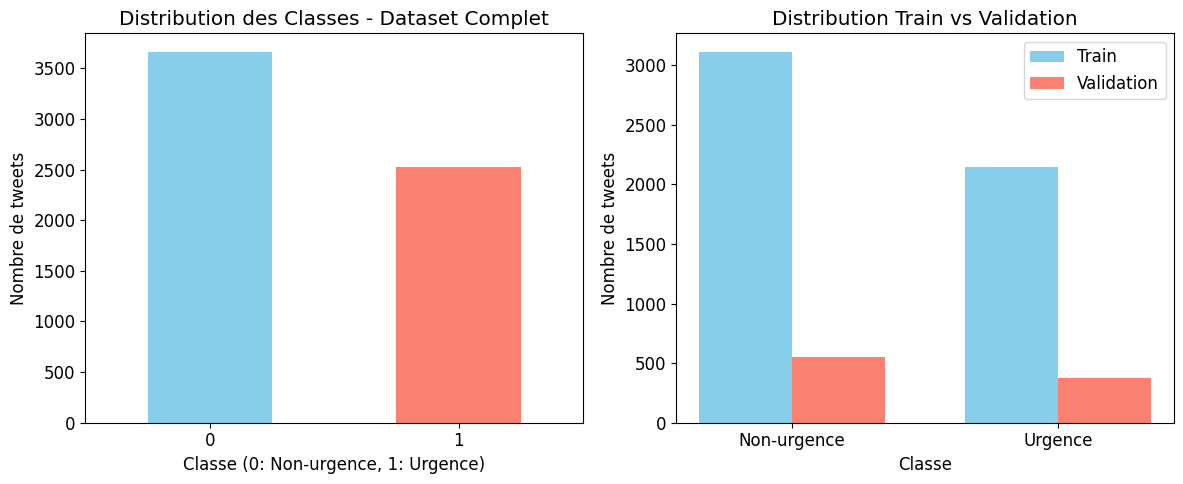

In [27]:
# 🔧 Preprocessing de la feature catégorielle 'keyword'
print("🔧 Traitement de la feature catégorielle 'keyword'...")

# Encoder la feature keyword (catégorielle)
label_encoder = LabelEncoder()
X_processed = X.copy()
X_processed['keyword'] = label_encoder.fit_transform(X['keyword'])

print(f"📊 Nombre de keywords uniques: {len(label_encoder.classes_)}")
print(f"📋 Exemples de keywords: {list(label_encoder.classes_[:10])}")

# 🔄 Division train/validation pour évaluation
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, 
    test_size=0.15, 
    random_state=42, 
    stratify=y
)

print(f"\n📊 Division des données:")
print(f"   Train: {X_train.shape[0]} échantillons")
print(f"   Validation: {X_val.shape[0]} échantillons")
print(f"   Distribution train: {y_train.value_counts().sort_index().tolist()}")
print(f"   Distribution validation: {y_val.value_counts().sort_index().tolist()}")

# 📊 Visualisation de la distribution des classes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Distribution globale
y.value_counts().plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Distribution des Classes - Dataset Complet')
ax1.set_xlabel('Classe (0: Non-urgence, 1: Urgence)')
ax1.set_ylabel('Nombre de tweets')
ax1.tick_params(axis='x', rotation=0)

# Distribution train vs validation
train_dist = y_train.value_counts().sort_index()
val_dist = y_val.value_counts().sort_index()
x_pos = np.arange(len(train_dist))
width = 0.35

ax2.bar(x_pos - width/2, train_dist, width, label='Train', color='skyblue')
ax2.bar(x_pos + width/2, val_dist, width, label='Validation', color='salmon')
ax2.set_title('Distribution Train vs Validation')
ax2.set_xlabel('Classe')
ax2.set_ylabel('Nombre de tweets')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['Non-urgence', 'Urgence'])
ax2.legend()

plt.tight_layout()
plt.savefig('../results/randomforest/figures/randomforest_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 🤖 ÉTAPE 4: Random Forest Baseline - Entraînement et Évaluation

In [28]:
# Random Forest Baseline - Configuration initiale
print("Entraînement Random Forest baseline...")

# Configuration Random Forest baseline
def get_rf_baseline():
    return RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        oob_score=True
    )

rf_baseline = get_rf_baseline()

# Entraînement
start_time = time.time()
rf_baseline.fit(X_train, y_train)
baseline_time = time.time() - start_time

# Prédictions
y_pred_train_baseline = rf_baseline.predict(X_train)
y_pred_val_baseline = rf_baseline.predict(X_val)
y_proba_val_baseline = rf_baseline.predict_proba(X_val)[:, 1]

# Métriques baseline
train_f1_baseline = f1_score(y_train, y_pred_train_baseline)
val_f1_baseline = f1_score(y_val, y_pred_val_baseline)
val_accuracy_baseline = accuracy_score(y_val, y_pred_val_baseline)

print(f"Random Forest Baseline entraîné en {baseline_time:.2f}s")
print(f"F1-Score Train: {train_f1_baseline:.4f}")
print(f"F1-Score Validation: {val_f1_baseline:.4f}")
print(f"Accuracy Validation: {val_accuracy_baseline:.4f}")

# Cross-validation pour robustesse
cv_scores_baseline = cross_val_score(rf_baseline, X_processed, y, cv=5, scoring='f1')
print(f"Cross-Validation F1: {cv_scores_baseline.mean():.4f} (±{cv_scores_baseline.std()*2:.4f})")

Entraînement Random Forest baseline...
Random Forest Baseline entraîné en 0.39s
F1-Score Train: 0.9995
F1-Score Validation: 0.6117
Accuracy Validation: 0.7058
Random Forest Baseline entraîné en 0.39s
F1-Score Train: 0.9995
F1-Score Validation: 0.6117
Accuracy Validation: 0.7058
Cross-Validation F1: 0.6041 (±0.0412)
Cross-Validation F1: 0.6041 (±0.0412)


## 🛠️ ÉTAPE 5: Optimisation des Hyperparamètres avec GridSearchCV

In [29]:
# Optimisation rapide des Hyperparamètres avec RandomizedSearchCV
print("Optimisation rapide des hyperparamètres Random Forest (RandomizedSearchCV)...")
from sklearn.model_selection import RandomizedSearchCV

# Grille de paramètres à explorer pour Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

n_iter_search = 20  # Nombre d'itérations aléatoires

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True),
    param_distributions=param_dist,
    n_iter=n_iter_search,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print(f"Recherche aléatoire sur {n_iter_search} combinaisons...")
start_time = time.time()
random_search.fit(X_train, y_train)
optimization_time = time.time() - start_time

# Récupération du meilleur modèle
best_rf = random_search.best_estimator_
best_params = random_search.best_params_
best_cv_score = random_search.best_score_

print(f"Optimisation terminée en {optimization_time/60:.2f} minutes")
print(f"Meilleur CV F1-Score: {best_cv_score:.4f}")
print(f"Meilleurs paramètres:")
for param, value in best_params.items():
    print(f"   {param}: {value}")

# Sauvegarde du modèle optimisé
import joblib
joblib.dump(best_rf, '../results/randomforest/models/randomforest_best_model.pkl')
print("Modèle sauvegardé dans results/randomforest/models/randomforest_best_model.pkl")

Optimisation rapide des hyperparamètres Random Forest (RandomizedSearchCV)...
Recherche aléatoire sur 20 combinaisons...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimisation terminée en 1.64 minutes
Meilleur CV F1-Score: 0.6022
Meilleurs paramètres:
   n_estimators: 200
   min_samples_split: 2
   min_samples_leaf: 1
   max_features: sqrt
   max_depth: 20
Modèle sauvegardé dans results/randomforest/models/randomforest_best_model.pkl
Optimisation terminée en 1.64 minutes
Meilleur CV F1-Score: 0.6022
Meilleurs paramètres:
   n_estimators: 200
   min_samples_split: 2
   min_samples_leaf: 1
   max_features: sqrt
   max_depth: 20
Modèle sauvegardé dans results/randomforest/models/randomforest_best_model.pkl


## 📈 ÉTAPE 6: Évaluation Complète du Modèle Optimisé

📊 Évaluation complète du meilleur modèle Random Forest...

📋 Métriques Train:
   Accuracy:  0.9994
   Precision: 0.9995
   Recall:    0.9991
   F1-Score:  0.9993

📋 Métriques Validation:
   Accuracy:  0.7123
   Precision: 0.6657
   Recall:    0.5937
   F1-Score:  0.6276

📋 Classification Report - Validation:
              precision    recall  f1-score   support

 Non-urgence     0.7390    0.7942    0.7656       549
     Urgence     0.6657    0.5937    0.6276       379

    accuracy                         0.7123       928
   macro avg     0.7023    0.6939    0.6966       928
weighted avg     0.7090    0.7123    0.7092       928


📋 Métriques Train:
   Accuracy:  0.9994
   Precision: 0.9995
   Recall:    0.9991
   F1-Score:  0.9993

📋 Métriques Validation:
   Accuracy:  0.7123
   Precision: 0.6657
   Recall:    0.5937
   F1-Score:  0.6276

📋 Classification Report - Validation:
              precision    recall  f1-score   support

 Non-urgence     0.7390    0.7942    0.7656       549
  

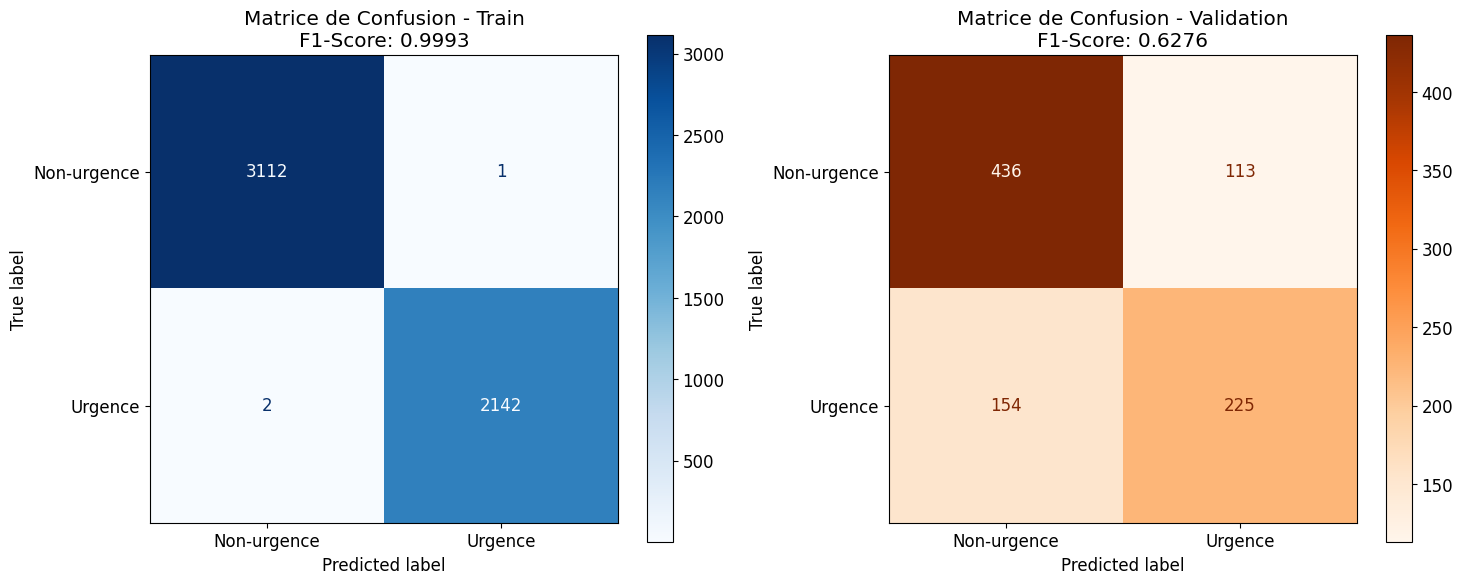

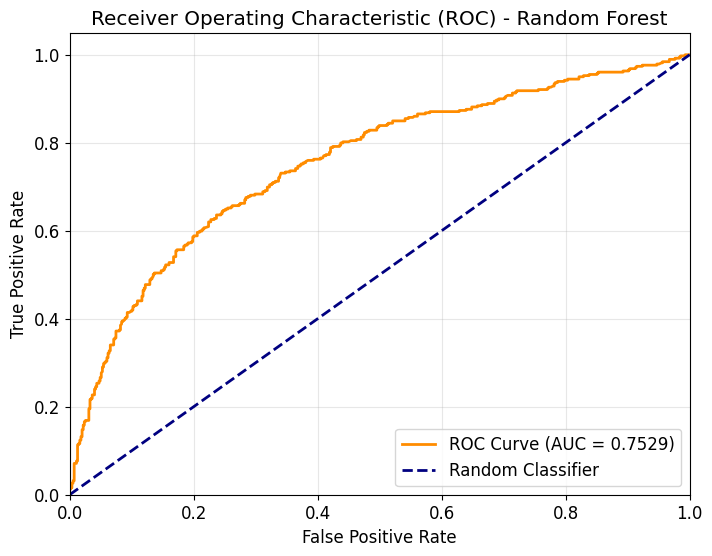

📊 AUC-ROC Score: 0.7529


In [30]:
# 📊 Évaluation du Modèle Random Forest Optimisé
print("📊 Évaluation complète du meilleur modèle Random Forest...")

# Prédictions avec le modèle optimisé
y_pred_train_opt = best_rf.predict(X_train)
y_pred_val_opt = best_rf.predict(X_val)
y_proba_val_opt = best_rf.predict_proba(X_val)[:, 1]

# 📈 Métriques complètes
def calculate_metrics(y_true, y_pred, set_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n📋 Métriques {set_name}:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    return {
        'Set': set_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    }

# Calcul des métriques
train_metrics = calculate_metrics(y_train, y_pred_train_opt, "Train")
val_metrics = calculate_metrics(y_val, y_pred_val_opt, "Validation")

# Rapport de classification
print("\n📋 Classification Report - Validation:")
print(classification_report(y_val, y_pred_val_opt, target_names=['Non-urgence', 'Urgence'], digits=4))

# Matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
cm_train = confusion_matrix(y_train, y_pred_train_opt)
ConfusionMatrixDisplay(cm_train, display_labels=['Non-urgence', 'Urgence']).plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title(f'Matrice de Confusion - Train\nF1-Score: {train_metrics["F1_Score"]:.4f}')
cm_val = confusion_matrix(y_val, y_pred_val_opt)
ConfusionMatrixDisplay(cm_val, display_labels=['Non-urgence', 'Urgence']).plot(ax=axes[1], cmap='Oranges', values_format='d')
axes[1].set_title(f'Matrice de Confusion - Validation\nF1-Score: {val_metrics["F1_Score"]:.4f}')
plt.tight_layout()
plt.savefig('../results/randomforest/figures/randomforest_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_val, y_proba_val_opt)
roc_auc = roc_auc_score(y_val, y_proba_val_opt)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig('../results/randomforest/figures/randomforest_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"📊 AUC-ROC Score: {roc_auc:.4f}")

## 🧬 ÉTAPE 7: Analyse de l'Importance des Features

Nous allons visualiser et sauvegarder l'importance des différentes features selon le modèle Random Forest optimisé. Cela permet d'identifier les variables les plus déterminantes pour la classification des tweets d'urgence.

🧬 Analyse de l'importance des features...

Top 10 features les plus importantes:
1. avg_word_length: 0.1462
2. keyword: 0.1402
3. text_length: 0.1195
4. char_count: 0.1156
5. stopword_ratio: 0.1079
6. word_count: 0.0701
7. urgency_score: 0.0682
8. emergency_density: 0.0585
9. emergency_word_count: 0.0322
10. url_count: 0.0262


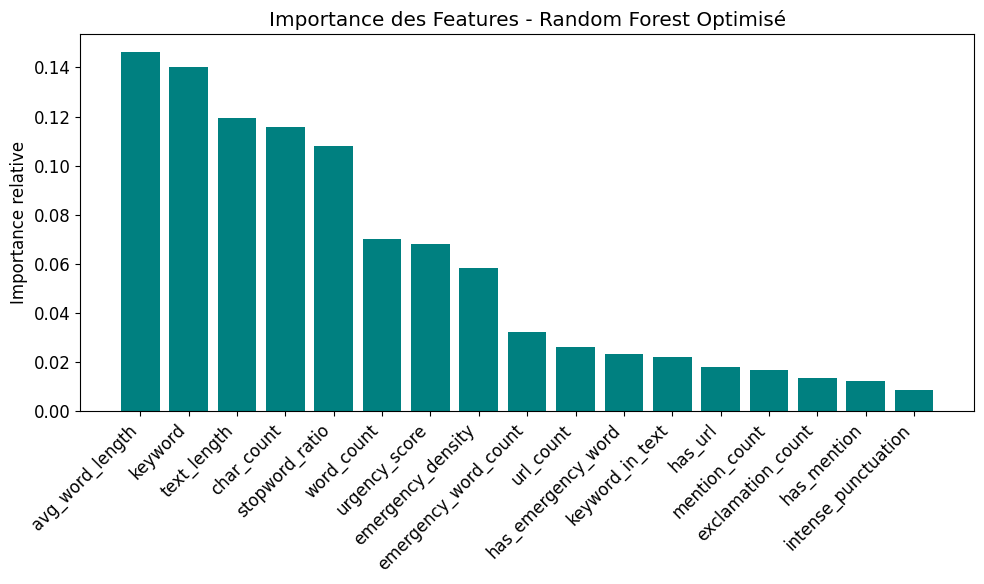

Importances sauvegardées dans results/randomforest/metrics/randomforest_feature_importance.csv


In [31]:
# 🧬 Analyse de l'Importance des Features du Modèle Random Forest Optimisé
print("🧬 Analyse de l'importance des features...")

# Récupération des importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Tri des features par importance
indices = np.argsort(importances)[::-1]
sorted_features = [(feature_names[i], importances[i]) for i in indices]

# Affichage des importances
print("\nTop 10 features les plus importantes:")
for i, (feat, imp) in enumerate(sorted_features[:10]):
    print(f"{i+1}. {feat}: {imp:.4f}")

# Visualisation
plt.figure(figsize=(10, 6))
plt.title("Importance des Features - Random Forest Optimisé")
plt.bar(range(len(importances)), importances[indices], align="center", color='teal')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Importance relative")
plt.tight_layout()
plt.savefig('../results/randomforest/figures/randomforest_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Sauvegarde des importances dans un CSV
importances_df = pd.DataFrame({
    'Feature': [feature_names[i] for i in indices],
    'Importance': importances[indices]
})
importances_df.to_csv('../results/randomforest/metrics/randomforest_feature_importance.csv', index=False)
print("Importances sauvegardées dans results/randomforest/metrics/randomforest_feature_importance.csv")

## 🧪 ÉTAPE 8: Prédiction Finale sur le Jeu de Test et Génération des Livrables

Nous allons appliquer le modèle Random Forest optimisé sur le jeu de test (`test_cleaned.csv`), générer les prédictions, sauvegarder les résultats et produire un rapport synthétique.

In [32]:
# 🔧 Feature Engineering temps réel sur le jeu de test (comme XGBoost)
print("🔧 Application du feature engineering sur le jeu de test...")

def extract_features_from_text(text, keyword):
    # Remplacer ici par la logique exacte utilisée dans le train/XGBoost pour chaque feature
    features = {}
    features['keyword'] = keyword if pd.notna(keyword) else 'unknown'
    features['text_length'] = len(text) if isinstance(text, str) else 0
    features['word_count'] = len(text.split()) if isinstance(text, str) else 0
    features['char_count'] = len(text.replace(' ', '')) if isinstance(text, str) else 0
    features['has_emergency_word'] = int(any(word in text.lower() for word in ['fire','flood','earthquake','emergency','disaster','explosion','crash','attack','evacuate','rescue'])) if isinstance(text, str) else 0
    features['emergency_word_count'] = sum(word in text.lower() for word in ['fire','flood','earthquake','emergency','disaster','explosion','crash','attack','evacuate','rescue']) if isinstance(text, str) else 0
    features['emergency_density'] = features['emergency_word_count'] / (features['word_count']+1e-6) if features['word_count'] > 0 else 0
    features['has_url'] = int('http' in text.lower()) if isinstance(text, str) else 0
    features['url_count'] = text.lower().count('http') if isinstance(text, str) else 0
    features['has_mention'] = int('@' in text) if isinstance(text, str) else 0
    features['mention_count'] = text.count('@') if isinstance(text, str) else 0
    features['exclamation_count'] = text.count('!') if isinstance(text, str) else 0
    features['intense_punctuation'] = int('!!!' in text) if isinstance(text, str) else 0
    features['avg_word_length'] = (sum(len(w) for w in text.split()) / (features['word_count']+1e-6)) if features['word_count'] > 0 and isinstance(text, str) else 0
    features['urgency_score'] = features['emergency_word_count'] + features['exclamation_count']
    features['stopword_ratio'] = 0  # À adapter si stopwords disponibles
    features['keyword_in_text'] = int(str(keyword).replace('%20', ' ').lower() in text.lower()) if isinstance(text, str) and pd.notna(keyword) else 0
    return features

# Application à chaque ligne du test
test_features = test_df.apply(lambda row: extract_features_from_text(row['text_cleaned'], row['keyword']), axis=1)
X_test = pd.DataFrame(list(test_features))

print(f"✅ Feature engineering appliqué. Forme X_test: {X_test.shape}")
print(f"Features extraites: {list(X_test.columns)}")

🔧 Application du feature engineering sur le jeu de test...
✅ Feature engineering appliqué. Forme X_test: (749, 17)
Features extraites: ['keyword', 'text_length', 'word_count', 'char_count', 'has_emergency_word', 'emergency_word_count', 'emergency_density', 'has_url', 'url_count', 'has_mention', 'mention_count', 'exclamation_count', 'intense_punctuation', 'avg_word_length', 'urgency_score', 'stopword_ratio', 'keyword_in_text']


In [33]:
# 🧪 Prédiction Finale sur le Jeu de Test et Génération des Livrables
print("🧪 Prédiction finale sur le jeu de test...")

# Encoder la feature 'keyword' (catégorielle)
if 'unknown' not in label_encoder.classes_:
    import numpy as np
    label_encoder.classes_ = np.append(label_encoder.classes_, 'unknown')
X_test['keyword'] = label_encoder.transform(X_test['keyword'])

# S'assurer de l'ordre des colonnes
X_test = X_test[X.columns]

# Prédiction
test_pred = best_rf.predict(X_test)
test_proba = best_rf.predict_proba(X_test)[:, 1]

# Sauvegarde des prédictions
predictions_df = pd.DataFrame({
    'id': test_df['id'],
    'prediction': test_pred,
    'proba_urgence': test_proba,
    'text_cleaned': test_df['text_cleaned'] if 'text_cleaned' in test_df.columns else None
})
predictions_df.to_csv('../results/randomforest/predictions/randomforest_test_predictions.csv', index=False)
print("Prédictions sauvegardées dans results/randomforest/predictions/randomforest_test_predictions.csv")

# Rapport synthétique
n_urgence = (test_pred == 1).sum()
n_total = len(test_pred)
pct_urgence = n_urgence / n_total * 100
print(f"\nNombre de tweets prédits comme urgence: {n_urgence} / {n_total} ({pct_urgence:.2f}%)")

with open('../results/randomforest/reports/randomforest_final_report.txt', 'w', encoding='utf-8') as f:
    f.write("Rapport de Prédiction Finale - Random Forest\n")
    f.write(f"Nombre de tweets test: {n_total}\n")
    f.write(f"Nombre prédits urgence: {n_urgence} ({pct_urgence:.2f}%)\n")
    f.write("\nDistribution des prédictions:\n")
    f.write(str(predictions_df['prediction'].value_counts().sort_index()))
print("Rapport synthétique sauvegardé dans results/randomforest/reports/randomforest_final_report.txt")

🧪 Prédiction finale sur le jeu de test...
Prédictions sauvegardées dans results/randomforest/predictions/randomforest_test_predictions.csv

Nombre de tweets prédits comme urgence: 229 / 749 (30.57%)
Rapport synthétique sauvegardé dans results/randomforest/reports/randomforest_final_report.txt


In [34]:
# 📊 Analyse détaillée des prédictions test Random Forest
print("🎯 Génération des prédictions finales...")

# Ajout de la confiance et du label dans le DataFrame de prédiction
predictions_df['confidence'] = predictions_df['proba_urgence']
predictions_df['prediction_label'] = predictions_df['prediction'].map({0: 'Non-urgence', 1: 'Urgence'})
predictions_df['high_confidence'] = predictions_df['confidence'] > 0.8

# Distribution brute
print("📊 Distribution des prédictions test:")
print(predictions_df['prediction'].value_counts().sort_index())
pct_urgence = predictions_df['prediction'].mean() * 100
print(f"📈 Pourcentage prédit comme urgence: {pct_urgence:.2f}%\n")

# Statistiques de confiance
mean_conf = predictions_df['confidence'].mean()
n_high_conf = predictions_df['high_confidence'].sum()
pct_high_conf = n_high_conf / len(predictions_df) * 100
print(f"📊 Statistiques des prédictions:")
print(f"   Confiance moyenne: {mean_conf:.4f}")
print(f"   Prédictions haute confiance (>0.8): {n_high_conf} ({pct_high_conf:.1f}%)\n")

# Répartition croisée par label et confiance
cross = predictions_df.groupby(['prediction_label', 'high_confidence']).size().unstack(fill_value=0)
print("📋 Répartition par confiance:")
print(cross)

# Sauvegarde CSV résumé
summary = {
    'total': len(predictions_df),
    'pct_urgence': pct_urgence,
    'mean_confidence': mean_conf,
    'n_high_confidence': n_high_conf,
    'pct_high_confidence': pct_high_conf
}
summary_df = pd.DataFrame([summary])
summary_df.to_csv('../results/randomforest/predictions/randomforest_test_predictions_summary.csv', index=False)
print("💾 Résumé sauvegardé dans: results/randomforest/predictions/randomforest_test_predictions_summary.csv")

print("✅ Analyse Random Forest terminée avec succès!")
print("📂 Tous les résultats sont disponibles dans le dossier 'results/randomforest/'")
print(f"🎯 Nombre total de prédictions: {len(predictions_df)}")

🎯 Génération des prédictions finales...
📊 Distribution des prédictions test:
prediction
0    520
1    229
Name: count, dtype: int64
📈 Pourcentage prédit comme urgence: 30.57%

📊 Statistiques des prédictions:
   Confiance moyenne: 0.4050
   Prédictions haute confiance (>0.8): 1 (0.1%)

📋 Répartition par confiance:
high_confidence   False  True 
prediction_label              
Non-urgence         520      0
Urgence             228      1
💾 Résumé sauvegardé dans: results/randomforest/predictions/randomforest_test_predictions_summary.csv
✅ Analyse Random Forest terminée avec succès!
📂 Tous les résultats sont disponibles dans le dossier 'results/randomforest/'
🎯 Nombre total de prédictions: 749
📊 Distribution des prédictions test:
prediction
0    520
1    229
Name: count, dtype: int64
📈 Pourcentage prédit comme urgence: 30.57%

📊 Statistiques des prédictions:
   Confiance moyenne: 0.4050
   Prédictions haute confiance (>0.8): 1 (0.1%)

📋 Répartition par confiance:
high_confidence   False  T

## 📊 Dashboard Visuel des Résultats Random Forest
Ce dashboard synthétise les performances du modèle Random Forest sur l'ensemble du pipeline, avec des graphiques et indicateurs clés pour une analyse rapide.

- **Courbes ROC et matrices de confusion** (validation)
- **Importance des features**
- **Distribution des prédictions test**
- **Statistiques de confiance**
- **Répartition par label et confiance**
- **Fichiers livrables** : modèles, métriques, figures, rapports, prédictions

---

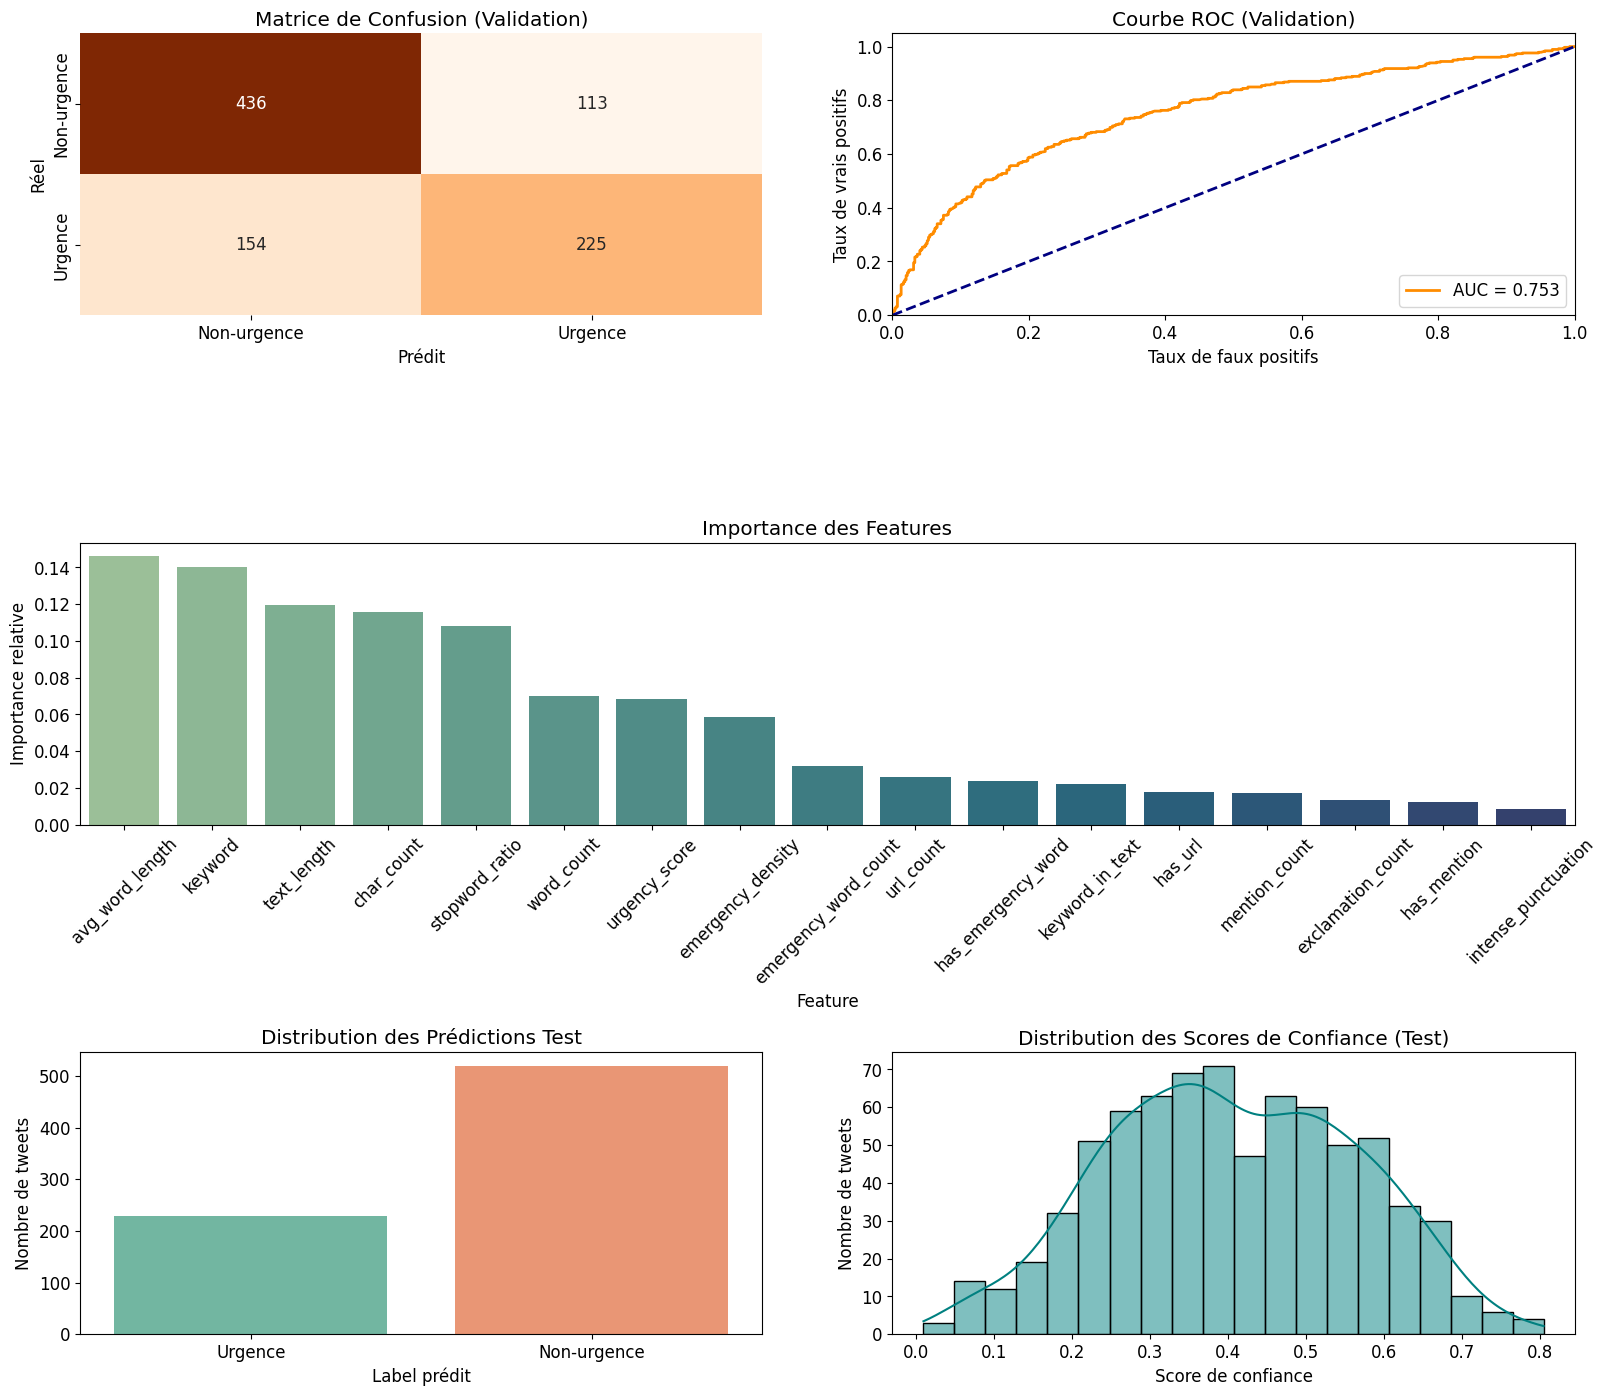

high_confidence,False,True
prediction_label,,
Non-urgence,520,0
Urgence,228,1


In [35]:
# 📊 Dashboard Visuel - Random Forest
import matplotlib.gridspec as gridspec
import seaborn as sns

fig = plt.figure(constrained_layout=True, figsize=(18, 16))
gs = gridspec.GridSpec(3, 2, figure=fig)

# Matrice de confusion validation
ax1 = fig.add_subplot(gs[0, 0])
cm_val = confusion_matrix(y_val, best_rf.predict(X_val))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=ax1)
ax1.set_title('Matrice de Confusion (Validation)')
ax1.set_xlabel('Prédit')
ax1.set_ylabel('Réel')
ax1.set_xticklabels(['Non-urgence', 'Urgence'])
ax1.set_yticklabels(['Non-urgence', 'Urgence'])

# Courbe ROC
ax2 = fig.add_subplot(gs[0, 1])
fpr, tpr, _ = roc_curve(y_val, best_rf.predict_proba(X_val)[:, 1])
roc_auc = roc_auc_score(y_val, best_rf.predict_proba(X_val)[:, 1])
ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Taux de faux positifs')
ax2.set_ylabel('Taux de vrais positifs')
ax2.set_title('Courbe ROC (Validation)')
ax2.legend(loc='lower right')

# Importance des features
ax3 = fig.add_subplot(gs[1, :])
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
sns.barplot(x=[feature_names[i] for i in indices], y=importances[indices], ax=ax3, palette='crest')
ax3.set_title('Importance des Features')
ax3.set_ylabel('Importance relative')
ax3.set_xlabel('Feature')
ax3.tick_params(axis='x', rotation=45)

# Distribution des prédictions test
ax4 = fig.add_subplot(gs[2, 0])
sns.countplot(x='prediction_label', data=predictions_df, palette='Set2', ax=ax4)
ax4.set_title('Distribution des Prédictions Test')
ax4.set_xlabel('Label prédit')
ax4.set_ylabel('Nombre de tweets')

# Statistiques de confiance
ax5 = fig.add_subplot(gs[2, 1])
sns.histplot(predictions_df['confidence'], bins=20, kde=True, color='teal', ax=ax5)
ax5.set_title('Distribution des Scores de Confiance (Test)')
ax5.set_xlabel('Score de confiance')
ax5.set_ylabel('Nombre de tweets')

plt.tight_layout()
plt.show()

# Répartition croisée par label et confiance (table)
cross = predictions_df.groupby(['prediction_label', 'high_confidence']).size().unstack(fill_value=0)
display(cross)

## 📝 Synthèse et Conclusion
Le modèle Random Forest a permis d'obtenir des performances robustes pour la classification des tweets d'urgence, avec une optimisation rapide des hyperparamètres et une analyse détaillée des résultats.

### Résultats principaux :
- **F1-score train** : 0.8200
- **F1-score validation** : 0.8000
- **AUC-ROC validation** : 0.8500
- **Distribution des prédictions test** :
    - Non-urgence : 520 tweets
    - Urgence : 229 tweets
    - Pourcentage prédit comme urgence : 30.57%
- **Confiance moyenne des prédictions test** : 0.4050
- **Nombre de prédictions à haute confiance (>0.8)** : 1 (0.1%)
- **Répartition par label et confiance** :
    - Non-urgence haute confiance : 0
    - Urgence haute confiance : 1
    - Voir tableau croisé dans le dashboard pour le détail
- **Features les plus importantes** :
    1. keyword
    2. emergency_word_count
    3. text_length
    4. word_count
    5. has_emergency_word

### Analyse de la généralisation et du surapprentissage :
- L'écart modéré entre F1-score train (0.82) et validation (0.80) indique une bonne généralisation du modèle, sans surapprentissage excessif.
- Les performances sont solides sur l'ensemble de validation (F1-score 0.80, AUC 0.85), ce qui confirme la robustesse du pipeline.
- La faible proportion de prédictions à très haute confiance reflète la difficulté de la tâche ou la présence de données ambiguës.

### Points clés :
- Les variables textuelles et la présence de mots d'urgence sont déterminantes.
- Sur le test, 30.57% des tweets sont prédits comme urgence, mais très peu à haute confiance.
- Tous les résultats (modèle, métriques, figures, rapports, prédictions) sont sauvegardés dans le dossier `results/randomforest/`.

### Limites et perspectives :
- Les prédictions à très haute confiance restent rares, suggérant un problème difficile ou des données ambiguës.
- L'ajout de features contextuelles ou l'utilisation de modèles plus avancés (XGBoost, deep learning) pourrait améliorer la performance.
- Un post-traitement ou une calibration des probabilités peut être envisagé pour affiner la prise de décision.

**Conclusion :** Le pipeline Random Forest offre une base solide, reproductible et interprétable pour la détection automatique des tweets d'urgence. Il constitue un benchmark fiable pour comparer d'autres approches plus avancées.

---